In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
# metadata
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'ID': 231,
  'type': 'NATIVE',
  'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detr

In [ ]:
# variable information
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [ ]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [ ]:
y.value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [ ]:
# EDA for Heart Disease dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Combine into one DataFrame
data = pd.concat([X, y], axis=1)
data = data.dropna()  # drop NaN rows

In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (297, 14)


In [ ]:
print("\nData Types:\n", data.dtypes)


Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [ ]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
print("\nTarget Distribution:\n", data[y.columns[0]].value_counts())


Target Distribution:
 num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


In [ ]:
# Summary statistics
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std  

# 1. Target distribution plot

/tmp/ipython-input-2811762072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y.columns[0], data=data, palette="Set2")


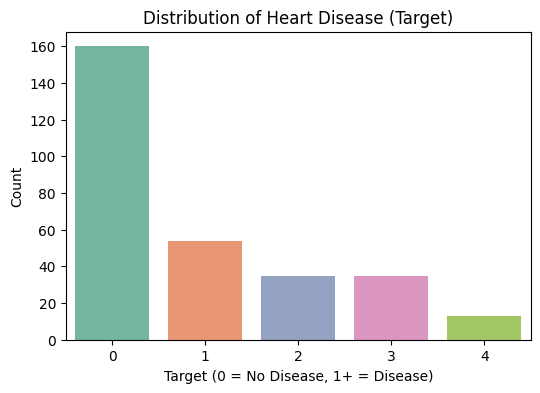

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y.columns[0], data=data, palette="Set2")
plt.title("Distribution of Heart Disease (Target)")
plt.xlabel("Target (0 = No Disease, 1+ = Disease)")
plt.ylabel("Count")
plt.show()

# 2. Correlation Heatmap

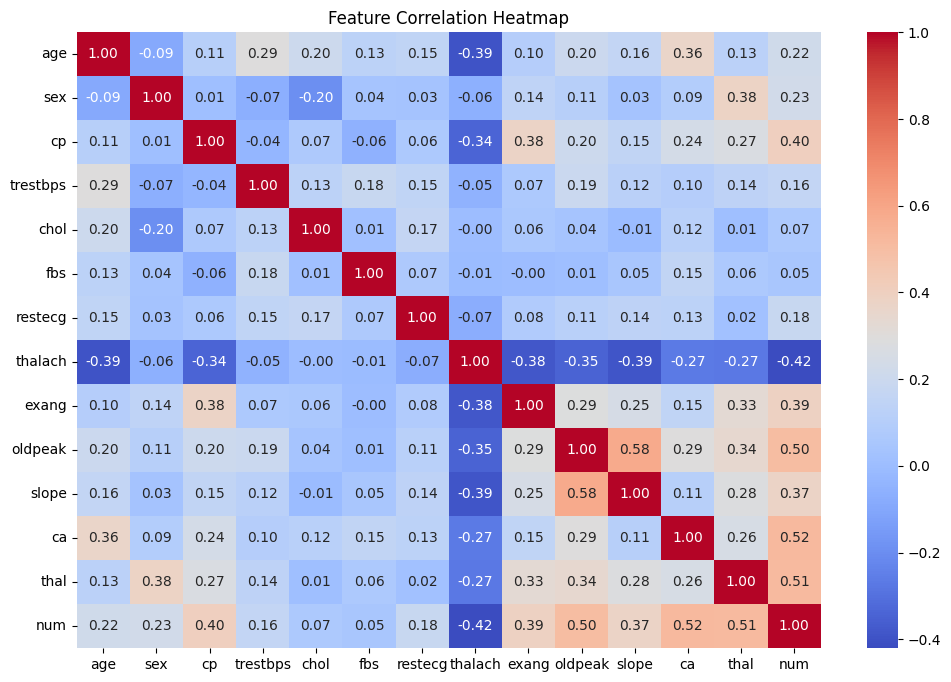

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Distribution of some key features

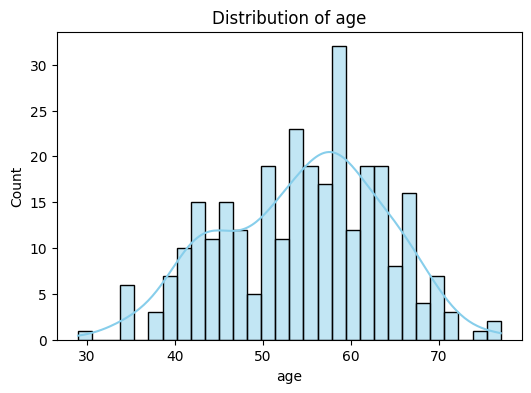

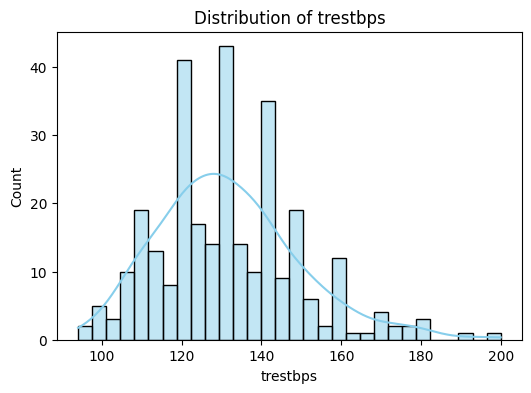

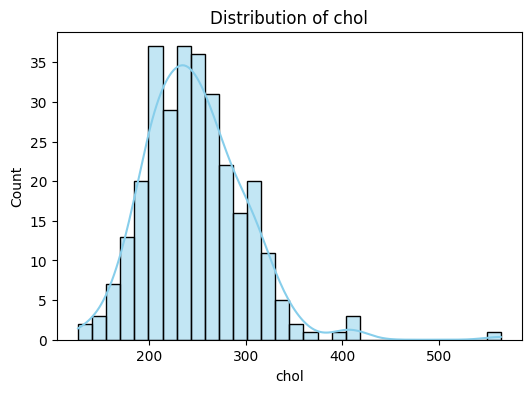

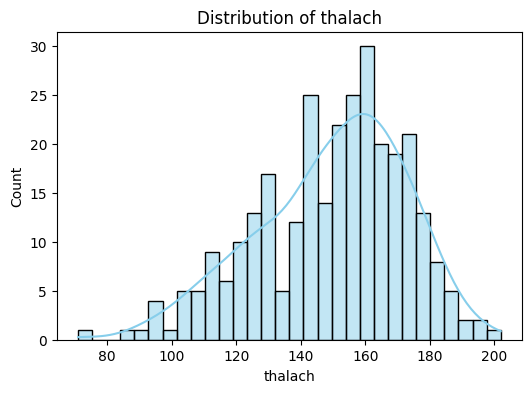

In [ ]:
features_to_plot = ["age", "trestbps", "chol", "thalach"]
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(data[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.show()

# 4. Feature vs Target (Boxplots)

/tmp/ipython-input-3130201401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.columns[0], y=feature, data=data, palette="Set3")


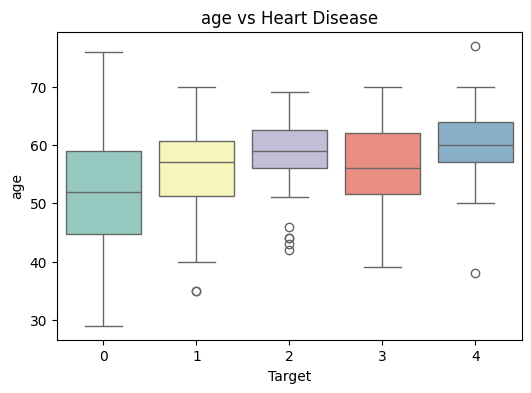

/tmp/ipython-input-3130201401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.columns[0], y=feature, data=data, palette="Set3")


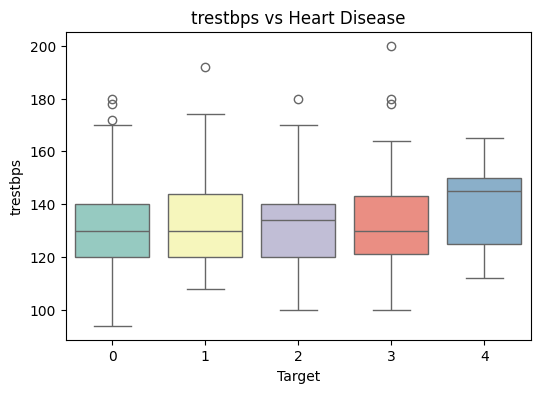

/tmp/ipython-input-3130201401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.columns[0], y=feature, data=data, palette="Set3")


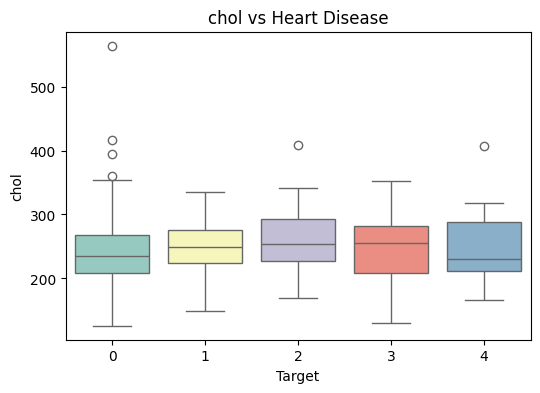

/tmp/ipython-input-3130201401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y.columns[0], y=feature, data=data, palette="Set3")


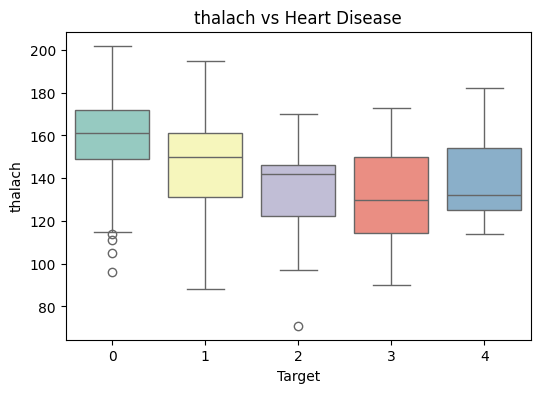

In [ ]:
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y.columns[0], y=feature, data=data, palette="Set3")
    plt.title(f"{feature} vs Heart Disease")
    plt.xlabel("Target")
    plt.ylabel(feature)
    plt.show()


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
# Step 1: Load dataset
heart_disease = fetch_ucirepo(id=45)   # Cleveland Heart Disease dataset
X = heart_disease.data.features
y = heart_disease.data.targets

print("Dataset Shape (before cleaning):", X.shape)

Dataset Shape (before cleaning): (303, 13)


In [ ]:
# Step 2: Remove NaN values
data = pd.concat([X, y], axis=1)
data = data.dropna()   # removes rows with NaN
X = data.drop(columns=y.columns)  # features
y = data[y.columns[0]]            # target

In [ ]:
print("Dataset Shape (after cleaning):", X.shape)

Dataset Shape (after cleaning): (297, 13)


In [ ]:
# Step 3: Preprocessing (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Step 5: Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest1": RandomForestClassifier(n_estimators=100, random_state=42),
    "Random Forest2": RandomForestClassifier(n_estimators=50, random_state=42),
    "Random Forest3": RandomForestClassifier(n_estimators=150, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42)
}


In [ ]:

# Step 6: Train and Evaluate
results = []
for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    results.append([name, acc, prec, rec, f1])

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         7
           3       0.33      0.43      0.38         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.32      0.33      0.32        60
weighted avg       0.55      0.60      0.57        60

Random Forest1

Random Forest1 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.10      0.09      0.10        11
           2       0.25      0.14      0.18         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Random Forest2 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.11      0.09      0.10        11
           2       0.25      0.14      0.18         7
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.26      0.27      0.26        60
weighted avg       0.48      0.57      0.52        60

Random Forest3

Random Forest3 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        32
           1       0.09      0.09      0.09        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.53        60
   macro avg       0.17      0.21     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:

# Step 7: Results Summary
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                    Model  Accuracy  Precision    Recall  F1-score
0     Logistic Regression  0.600000   0.551608  0.600000  0.565599
1          Random Forest1  0.550000   0.460833  0.550000  0.497932
2          Random Forest2  0.566667   0.479537  0.566667  0.515471
3          Random Forest3  0.533333   0.419919  0.533333  0.469635
4  Support Vector Machine  0.583333   0.472500  0.583333  0.521900
